In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.optimize import fsolve
import time as time

In [2]:
import algos_QP
import RandomWalk
from RandomWalk import Random_walk

In [14]:
reload(algos_QP)

<module 'algos_QP' from 'algos_QP.py'>

In [3]:
nState=1000
nStep=100
nFeatures=100
gamma=0.1

P_pi,r_pi=Random_walk.compute_policy(nState,nStep)
#P_pi=0.*P_pi

In [15]:
#First, compute value function in the tabular case
nIter=1000
history=True

gamma_=np.array([0.3,0.5,0.9,0.95,0.99,0.995,0.999])
gamma_=np.array([0.9])


algos=['DP','GD','GD_am','AdaGrad','RMSProp','ADAM','CG']

nAlgos=len(algos)
t_algo=np.zeros((gamma_.shape[0],nAlgos))
nIter_algo=np.zeros((gamma_.shape[0],nAlgos))
err=np.zeros((gamma_.shape[0],nAlgos))
v_init=None

if(history):
    v=np.zeros((gamma_.shape[0],nAlgos,nIter+1,nState+1)) 
else:
    v=np.zeros((gamma_.shape[0],nAlgos,nState+1))

for g in enumerate(gamma_):
    for algo in enumerate(algos):
        
        n,t,v_res=algos_QP.compute_valueFunction(
            P_pi,r_pi,discountFactor=g[1],
            algo=algo[1],nIter_max=nIter,x_init_=v_init,
            verbose=True,history=history)
        
        v[g[0],algo[0],:]=v_res
        t_algo[g[0],algo[0]]=t
        nIter_algo[g[0],algo[0]]=n

    n,t,v_TD=algos_QP.compute_valueFunction(
            P_pi,r_pi,discountFactor=g[1],
            algo='Newton',nIter_max=nIter,x_init_=v_init,
            verbose=True,history=False)

    #Now, compute errors
    if(history):
        err=np.zeros((gamma_.shape[0],nAlgos,nIter+1))
        for algo in enumerate(algos):
            err[g[0],algo[0],:]=np.max(np.abs(v[g[0],algo[0],:]-v_TD),1)

    else:
        for algo in enumerate(algos):
            
            err[g[0],algo[0]]=np.max(np.abs(v[g[0],algo[0],:]-v_TD))
            print 'Algo:',algo[1], '\t | final error:', err[g[0],algo[0]]
            #print 'Algo:',algo[1], '\t | Time:', t_algo[g[0],algo[0]]

Algo: DP 	 | Time (s): 0.141324307692 	 | #Iter: 176 	 | T/iter: 0.000802979020979
Algo: GD 	 | Time (s): 2.05029292308 	 | #Iter: 1000 	 | T/iter: 0.00205029292308
Algo: GD_am 	 | Time (s): 1.32031015385 	 | #Iter: 902 	 | T/iter: 0.00146375848542
Algo: AdaGrad 	 | Time (s): 1.38677210256 	 | #Iter: 1000 	 | T/iter: 0.00138677210256
Algo: RMSProp 	 | Time (s): 1.45737312821 	 | #Iter: 1000 	 | T/iter: 0.00145737312821
Algo: ADAM 	 | Time (s): 1.41440984615 	 | #Iter: 1000 	 | T/iter: 0.00141440984615
Algo: CG 	 | Time (s): 0.0383819487179 	 | #Iter: 23 	 | T/iter: 0.00166878037904
Algo: Newton 	 | Time (s): 0.17699774359 	 | #Iter: 1 	 | T/iter: 0.17699774359


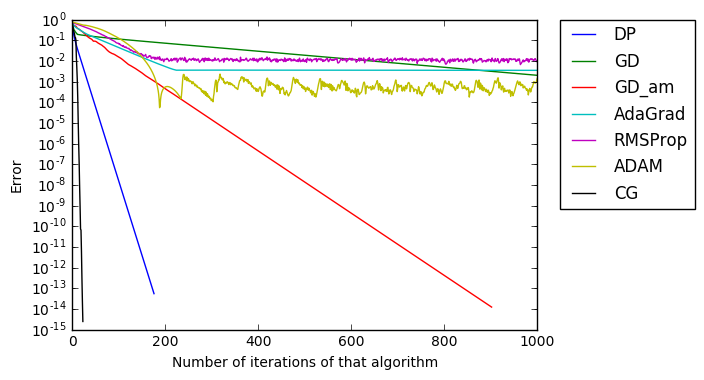

In [16]:
#plot the learning curves
plot_time=False

for algo in range(nAlgos):
    if(plot_time):
    
        plt.semilogy((t_algo[0,algo]/nIter_algo[0,algo])*np.arange(nIter_algo[0,algo]+1),err[0,algo,range(int(nIter_algo[0,algo]+1))],label=algos[algo])
        plt.xlabel('Running time (s)')
    else:
        plt.semilogy(np.arange(nIter_algo[0,algo]+1),err[0,algo,range(int(nIter_algo[0,algo]+1))],label=algos[algo])
        plt.xlabel('Number of iterations of that algorithm')
    
plt.ylabel('Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.savefig('C:\Users\Mathieu\Dropbox\PolyMTL\Cours\COMP762 - Reinforcement Learning\Project\Presentation\images\DP_QP.png', bbox_inches='tight')
plt.show()

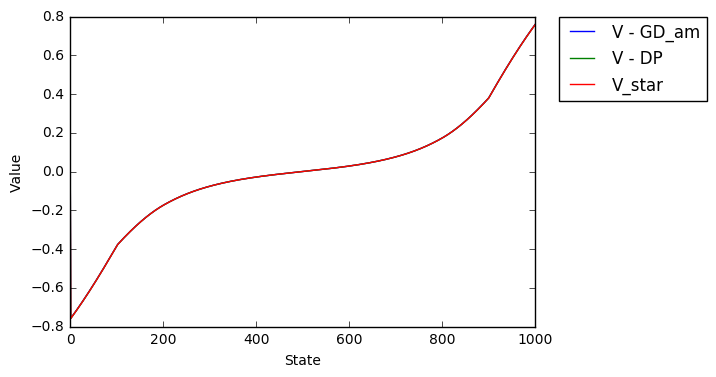

In [132]:
#plot the learned value functions
#plot the learning curves
for algo in range(nAlgos):
    plt.plot(v[0,algo,nIter,:],label='V - '+algos[algo])

plt.plot(v_TD,label='V_star')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()